# Import

In [185]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt

In [186]:
with MPRester("g23npTJNAhDPnQMr") as m:

    #Télécharger la bande de la structure
    bs = m.get_bandstructure_by_material_id("mp-9363")

# 1. Bande interdite

In [187]:
print(bs.get_band_gap())

{'direct': False, 'energy': 2.2617, 'transition': '\\Gamma-F'}


L'énergie de la bande interdite est de 2.2617eV. La bande interdite n'est pas directe car le maximum de la bande de valence et le minimum de la bande de conduction ne se trouvent pas sur le même k point. Le maximum de la bande de valence se trouve au point Γ et le minimum de la bande de conduction au point F.

# 2. Dispersion

La dispersion s'exprime comme la pente $$ \frac{Δy}{Δx} $$ ou Δy est la différence d'énergie pour chaque intervalle et Δx est la différence de distance entre deux intervalles consécutifs. La dispersion est maximale pour la pente la plus grande et elle est minimale pour la pente la plus proche de 0.

# 2.1 Calculs des maximums et des minimums de dispersion

In [188]:
ticks = plotter.get_ticks()
distance = ticks.get('distance')


#Calcul de la distance de chaque intervalle
dist = []
for i in range(len(distance)-1):
    d = distance[i+1] - distance[i]
    if d != 0 and d not in dist:
        dist.append(d)

#Indice de la dernière bande de valence
indice_val = bs.get_vbm()['band_index'].values() #indice 15

#Indice de la première bande de conduction
indice_cond = bs.get_cbm()['band_index'].values() # indice 16

#Calcul des  différences d'énergies pour les différents intervalles
data = plotter.bs_plot_data()
Energie = data['energy']

E_cond = []
pente_cond = []

E_val = []
pente_val = []


for j in range(len(dist)):
    cond = Energie['1'][j][:][16]
    val = Energie['1'][j][:][15]
    
    E_cond.append(cond[0]-cond[-1])
    E_val.append(val[0]-val[-1])
    
    pente_cond.append(abs(E_cond[j]/dist[j]))
    pente_val.append(abs(E_val[j]/dist[j]))
    
#Calcul des pentes maximums et minimums 
max_pente_cond = max(pente_cond)
max_pente_val = max(pente_val)
min_pente_cond = min(pente_cond)
min_pente_val = min(pente_val)

#Calcul des index ou les pentes sont maximums ou minimums pour savoir dans quel intervalle on se trouve
index_cond_max = 0
index_val_max  = 0
index_cond_min = 0
index_val_min = 0
for a,b in enumerate(pente_cond) :
    if b == max_pente_cond :
        index_cond_max = a
    if b == min_pente_cond :
        index_cond_min = a
for c,d in enumerate(pente_val):
    if d == max_pente_val:
        index_val_max = c
    if d == min_pente_val :
        index_val_min = c
        
print("Distance entre les intervalles:",dist)
print(" ")
print("Différence d'énergie de conduction:", E_cond)
print(" ")
print("Différence d'énergie de valence:",E_val)
print(" ")
print("Pente maximale de conduction :",max_pente_cond,"à l'index :",index_cond_max )
print(" ")
print("Pente minimale de conduction :",min_pente_cond,"à l'index :",index_cond_min)
print(" ")
print("Pente maximale de valence :",max_pente_val,"à l'index :",index_val_max )
print(" ")
print("Pente minimale de valence :",min_pente_val,"à l'index :",index_val_min)    

Distance entre les intervalles: [0.8686509751750421, 0.5449659803288464, 0.9410916393546509, 0.4072946657838563, 1.0155118000061711, 0.4705458156311839, 0.142401631694149, 0.8150092693063131, 0.27490823851376334]
 
Différence d'énergie de conduction: [0.6785999999999994, -0.8267999999999995, 0.09129999999999949, 0.05690000000000062, -0.17320000000000046, 1.2568000000000001, -0.07500000000000018, -1.0655000000000001, 0.33000000000000007]
 
Différence d'énergie de valence: [0.5396000000000001, 0.1774, -0.6184000000000001, -0.09860000000000002, 0.7098000000000001, -0.2803, 0.018900000000000028, -0.3498000000000001, -0.09119999999999995]
 
Pente maximale de conduction : 2.6709407633646585 à l'index : 5
 
Pente minimale de conduction : 0.09701499427049212 à l'index : 2
 
Pente maximale de valence : 0.6989579047684987 à l'index : 4
 
Pente minimale de valence : 0.13272319828886198 à l'index : 6


# 2.2 Affichage sur le graphe

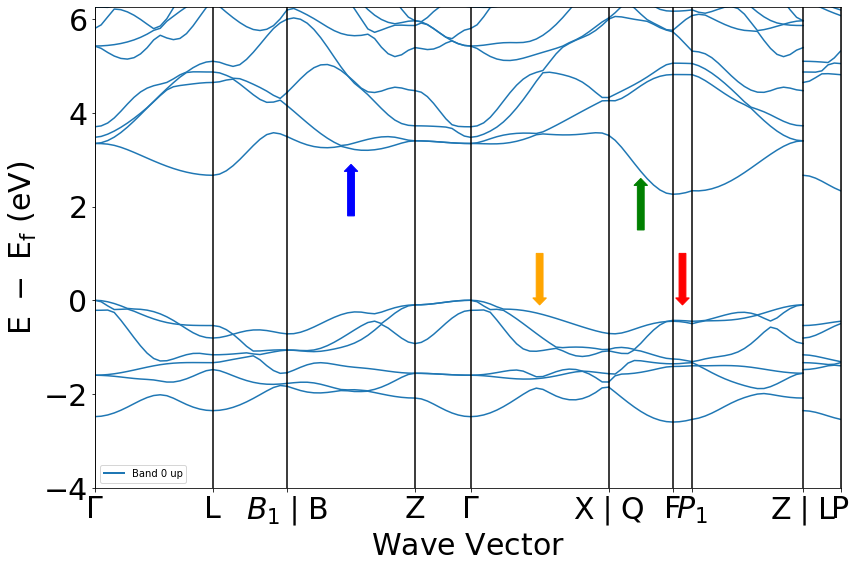

In [190]:
plotter.get_plot()

#Calcul de l'évolution de la distance 
dist_evol = []
sum_dist = 0
for i,j in enumerate(dist):
    sum_dist += j
    dist_evol.append(sum_dist)

# Conduction 
dist_cond_max = (dist_evol[5] + dist_evol[4])/2
Fleche_cond_max = plt.arrow(dist_cond_max,1.5,0,0.95,color ='green',width = 0.05,head_width = 0.1 )

dist_cond_min = (dist_evol[2] + dist_evol[1])/2
Fleche_cond_min = plt.arrow(dist_cond_min,1.8,0,0.95,color ='blue',width = 0.05,head_width = 0.1 )

# Valence
dist_val_max = (dist_evol[4] + dist_evol[3])/2
Fleche_val_max = plt.arrow(dist_val_max,1,0,-0.95,color ='orange',width = 0.05,head_width = 0.1 )

dist_val_min = (dist_evol[6] + dist_evol[5])/2
Fleche_val_min = plt.arrow(dist_val_min,1,0,-0.95,color ='red',width = 0.05,head_width = 0.1 )


 



* Bande de valence : la <font color='orange'>flèche orange</font> indique la **dispersion maximale** tandis que la <font color='red'>flèche rouge</font> indique la **dispersion minimale**.

    La direction de la dispersion maximale est Γ - X et la direction de la dispersion minimale est F - P1.
    

* Bande de conduction : la <font color='green'>flèche verte</font> indique la **dispersion maximale** tandis que la <font color='blue'>flèche bleue</font> indique la **dispersion minimale**. 

    La direction de la dispersion maximale est Q - F et la direction de la dispersion minimale est B - Z.

# 3. Masse effective

La masse effective est définie par le tenseur d'ordre 2 des dérivées secondes de l'énergie E
par rapport au vecteur d'onde k : $$(\frac{1}{m})_{ij} = \frac{1}{\hbar^{2}}  \frac{\partial^{2}E(k)}{\partial k_{i} \partial k_{j}} $$ avec $$ E(k) = ak^{2} + bk + c$$ car la dispersion est parabolique